# Analysis of sales data

### Import and merge data from multiple csv files

In [17]:
import os
import pandas as pd
import numpy as np

files = [file for file in os.listdir(path) if not file.startswith('.')]

df = pd.DataFrame()

for file in files:
    df1 = pd.read_csv("./Sales_Data/"+file)
    df = pd.concat([df, df1])
    
df.to_csv("datafinal.csv", index=False)

In [18]:
df2 = pd.read_csv("datafinal.csv")
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [3]:
df2['Quantity Ordered'] = pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each'] = pd.to_numeric(df2['Price Each'])

ValueError: Unable to parse string "Quantity Ordered" at position 519

Troubleshooting the error at position 519

In [4]:
df.iloc[[519]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


The data at position 519 seems to be incorrect. This will result in errors and should be filtered out from the dataset.

### Data cleaning

In [5]:
# One obvious cleaning required will be to get rid of NAN values in the data
dfNAN = df2[df2.isna().any(axis=1)]
display(dfNAN.head())

df2 = df2.dropna(how='all')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
# To solve the error in position 519, a filter is applied to eliminate all Order ID that is recorded as "Order ID"

df2=df2[df2['Order ID']!='Order ID']

# Now we can change the data type without any errors

df2['Quantity Ordered'] = pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each'] = pd.to_numeric(df2['Price Each'])
df2['Order Date'] = pd.to_datetime(df2['Order Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### Adding columns that will be useful for the analysis

In [7]:
# Adding city column

# The data may be inconsistent with a mixture of capital and non capital letters, to standardise this, covert
# the first letter of each word to capital

df2['Purchase Address'] = df2['Purchase Address'].str.title() 
df2

def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
df2['city'] = df2['Purchase Address'].apply(lambda x:get_city(x)+' '+ get_state(x))
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1St St, Dallas, Tx 75001",Dallas Tx
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, Ma 02215",Boston Ma
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8Th St, Los Angeles, Ca 90001",Los Angeles Ca
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, Ca 90001",Los Angeles Ca
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, Ca 94016",San Francisco Ca
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12Th St, San Francisco, Ca 94016",San Francisco Ca
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, Ca 94016",San Francisco Ca


In [8]:
# Adding month column
df2['Order Month'] = pd.to_datetime(df2['Order Date']).dt.month
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1St St, Dallas, Tx 75001",Dallas Tx,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, Ma 02215",Boston Ma,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8Th St, Los Angeles, Ca 90001",Los Angeles Ca,4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, Ca 90001",Los Angeles Ca,9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, Ca 94016",San Francisco Ca,9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12Th St, San Francisco, Ca 94016",San Francisco Ca,9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, Ca 94016",San Francisco Ca,9


### Data Visualisation and Exploration

### Monthly breakdown of sales

In [9]:
df2['sales']=df2['Price Each'] * df2['Quantity Ordered']
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Order Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1St St, Dallas, Tx 75001",Dallas Tx,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, Ma 02215",Boston Ma,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8Th St, Los Angeles, Ca 90001",Los Angeles Ca,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, Ca 90001",Los Angeles Ca,9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, Ca 94016",San Francisco Ca,9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12Th St, San Francisco, Ca 94016",San Francisco Ca,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, Ca 94016",San Francisco Ca,9,379.99


In [10]:
df2.groupby(["Order Month"]).sum()

,Quantity Ordered,Price Each,sales
Order Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


range(1, 13)


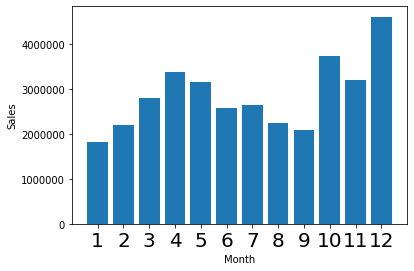

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,df2.groupby(['Order Month']).sum()['sales'])
plt.xticks(months,rotation='horizontal', size=20)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

### Breakdown of product sales in each city

In [12]:
df2.groupby(['city']).sum()

,Quantity Ordered,Price Each,Order Month,sales
city,,,,
Atlanta Ga,16602,2.779908e+06,104794,2.795499e+06
Austin Tx,11153,1.809874e+06,69829,1.819582e+06
Boston Ma,22528,3.637410e+06,141112,3.661642e+06
Dallas Tx,16730,2.752628e+06,104620,2.767975e+06
Los Angeles Ca,33289,5.421435e+06,208325,5.452571e+06
New York City Ny,27932,4.635371e+06,175741,4.664317e+06
Portland Me,2750,4.471893e+05,17144,4.497583e+05
Portland Or,11303,1.860558e+06,70621,1.870732e+06
San Francisco Ca,50239,8.211462e+06,315520,8.262204e+06


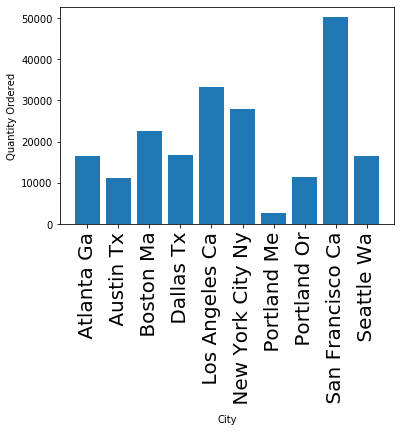

In [13]:

import matplotlib.pyplot as plt

keys = [city for city, df in df2.groupby(['city'])]

plt.bar(keys,df2.groupby(['city']).sum()['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=20)
plt.show()

### Determine when to display advertisements to maximize likelihood of customer's buying product?

In [14]:
# To do this we will use the hours to determine the suitable hours to display advertisements
df2['Hour'] = df2['Order Date'].dt.hour
df2['Count'] = 1
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,Order Month,sales,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1St St, Dallas, Tx 75001",Dallas Tx,4,23.90,8,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, Ma 02215",Boston Ma,4,99.99,22,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca,4,600.00,14,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, Ca 90001",Los Angeles Ca,4,11.99,14,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8Th St, Los Angeles, Ca 90001",Los Angeles Ca,4,11.99,9,1


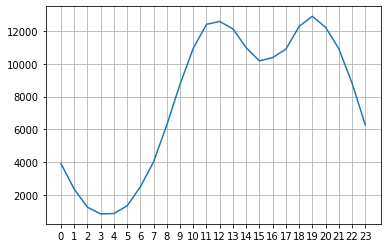

In [15]:
keys = [pair for pair, df in df2.groupby(['Hour'])]

plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

From the graph, it would be ideal to advertise between 10am to 8pm.

### Determine product recomendation for customers who buy a particular product (Products usually bought together)

In [97]:
df2['Product'] = df2['Product'].str.title() 


df3 = df2[df2['Order ID'].duplicated(keep=False)]
df3['Grouped'] = df3.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df4 = df3[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [98]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df4['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Iphone', 'Lightning Charging Cable') 1005
('Google Phone', 'Usb-C Charging Cable') 987
('Iphone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'Usb-C Charging Cable') 361
('Iphone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose Soundsport Headphones') 220
('Usb-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Most sold product

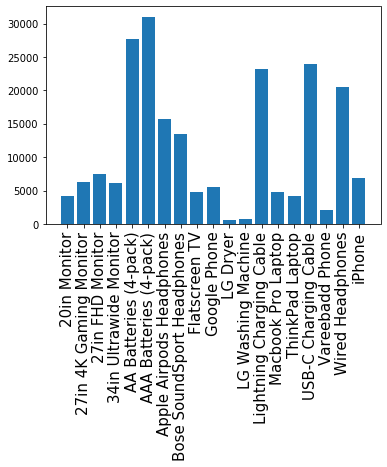

In [16]:
df5 = df2.groupby('Product')
quantity_ordered = df5.sum()['Quantity Ordered']

keys = [pair for pair, df in df5]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=15)
plt.show()

### Is the quantity sold influenced by the price?

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


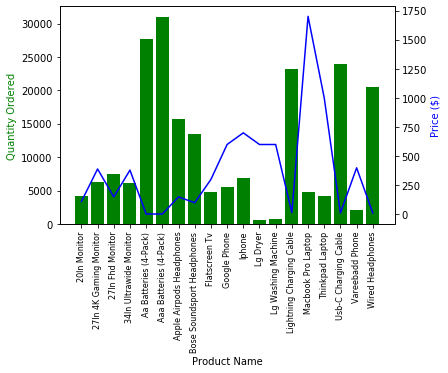

In [102]:
prices = df2.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

It is observed that products with higher price is usually sold in lower quantity, price has a high influence in the quantity sold